# 1 - Data Preprocessing

# Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set

In [5]:
dataset_train = pd.read_csv('E:\\Edu\\Data Science and ML\\Machinelearningaz\\Datasets\\Part 8 - Deep Learning\\LSTM\\Google_Stock_Price_Train.csv')
print(dataset_train.head())
training_set = dataset_train.iloc[:, 1:2].values

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800


# Feature Scaling

In [6]:
#if u have sigmoid as o/p layer  its better to use normalisation

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output

In [7]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
'''
Input shape
3D tensor with shape (batch_size, timesteps, input_dim).


batchsize=no of lines of the i/p= X_train.shape[0] no of rows
timestamps=60  =X_train.shape[1] no of columns
input_dim=no of predictors/indicators =1= stock price
'''

# 2 - Building the RNN

# Importing the Keras libraries and packages

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [10]:
# Initialising the RNN
regressor = Sequential()

In [11]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))#return_sequences = True becoz we are adding  layers after this layers
regressor.add(Dropout(0.2))  #to reduce overfitting

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))#rate of neurons u want to ignore during the training

In [13]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [14]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50)) #Since this is the last layer so we set return sequence =False which is default
regressor.add(Dropout(0.2))

In [15]:
# Adding the output layer
regressor.add(Dense(units = 1)) #to make full connections we use the dense layer 

In [16]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')   # there are optimizer which are good rmsprop and adam 

In [17]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32) 
# for every 32 stock prices sent as batch and backpropagated the loss 
#as more epochs increase the loss decreases ie converges

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 17s 15ms/step - loss: 0.0563
Epoch 2/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0068
Epoch 3/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0049
Epoch 5/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0044
Epoch 7/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0046
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0048
Epoch 9/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0041
Epoch 11/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0038
Epoch 12/100
1198/1198 [

# 3 - Making the predictions and visualising the results

In [18]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('E:\\Edu\\Data Science and ML\\Machinelearningaz\\Datasets\\Part 8 - Deep Learning\\LSTM\\Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [19]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)  # along vertical concatination
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results

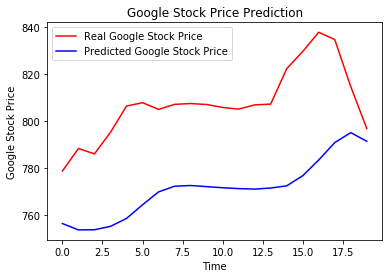

In [20]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()